## Data Visualization <br>
### Homework 1 - EDA<br>
### Barsegh Atanyan

Dataset: https://www.kaggle.com/code/ramendrachaudhary/pizza-sales-analysis

### Basic info on the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data Model - Pizza Sales.xlsx')
df.shape

(48620, 12)

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [5]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

### Several Barplots to show the number of orders for each pizza size, category and number of pizzas in each order

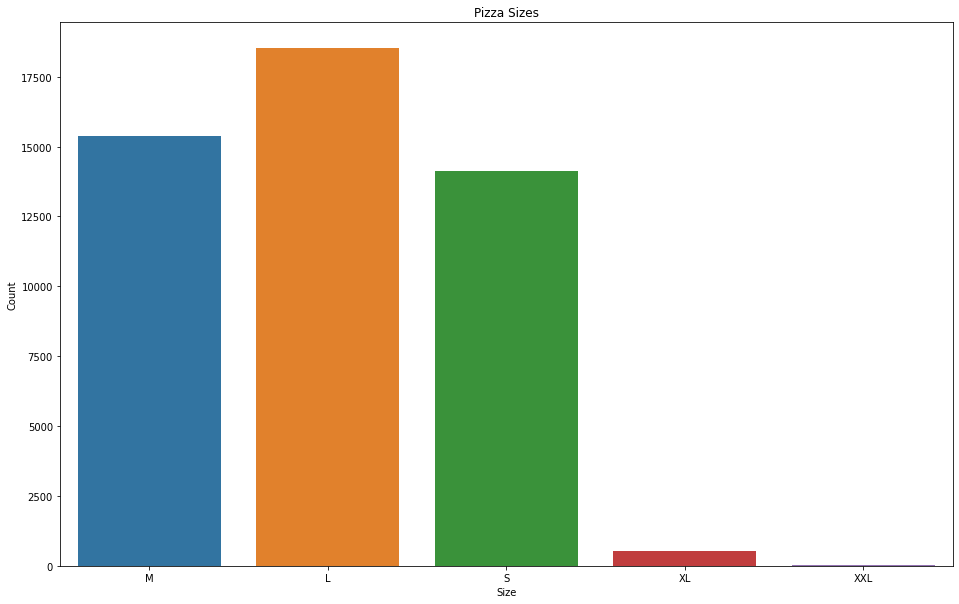

In [6]:
plt.figure(figsize=(16, 10))
sns.countplot(x = 'pizza_size', data=df)
plt.title('Pizza Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

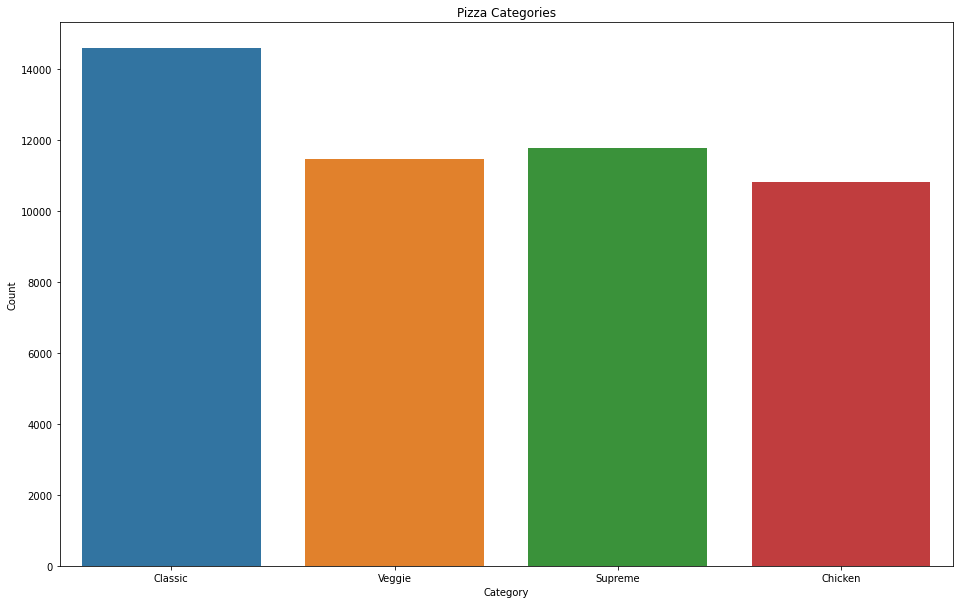

In [7]:
plt.figure(figsize=(16, 10))
sns.countplot(x = 'pizza_category', data=df)
plt.title('Pizza Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

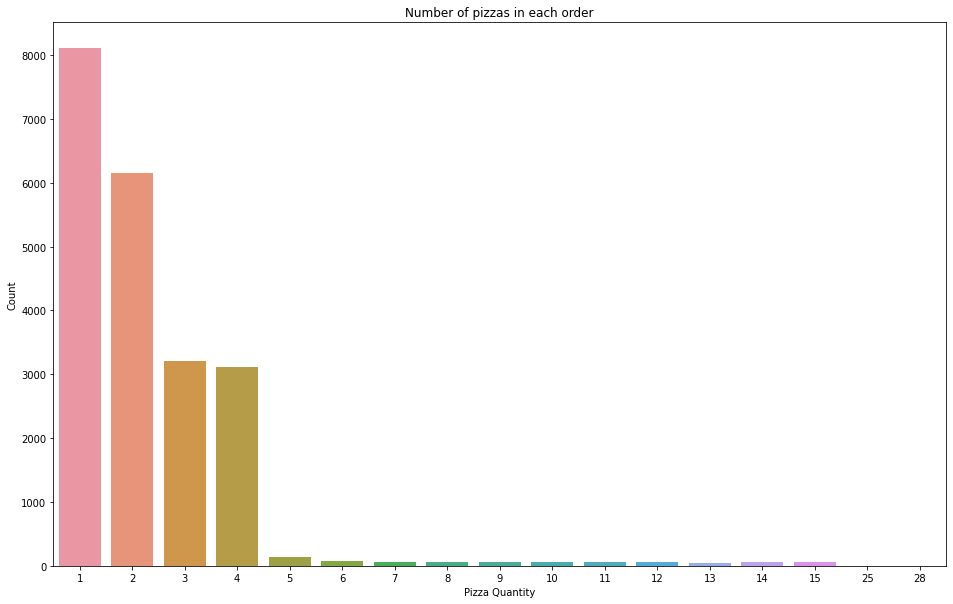

In [8]:
order_quantities = df.groupby('order_id')['quantity'].sum()

plt.figure(figsize=(16, 10))
sns.countplot(x = order_quantities.values)
plt.title('Number of pizzas in each order')
plt.xlabel('Pizza Quantity')
plt.ylabel('Count')
plt.show()

### Here one can find the most ordered pizzas by name or by id (includes the size as well). Also, a barplot for ingridients is constructed to show the most common toppings. Note that Mozzarella Cheese and Tomato Sauce are excluded as they are used for all pizzas according to data documentation.

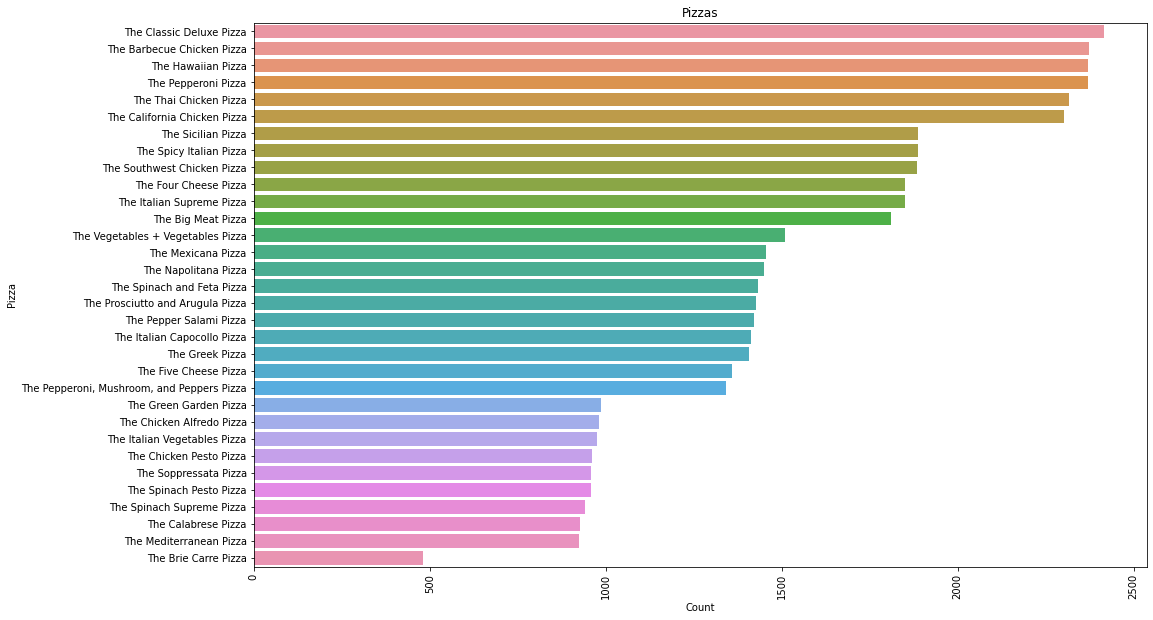

In [9]:
pizza_counts = df['pizza_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(16, 10))
sns.barplot(x = pizza_counts.values, y = pizza_counts.index)
plt.xticks(rotation=90)
plt.title('Pizzas')
plt.ylabel('Pizza')
plt.xlabel('Count')
plt.show()

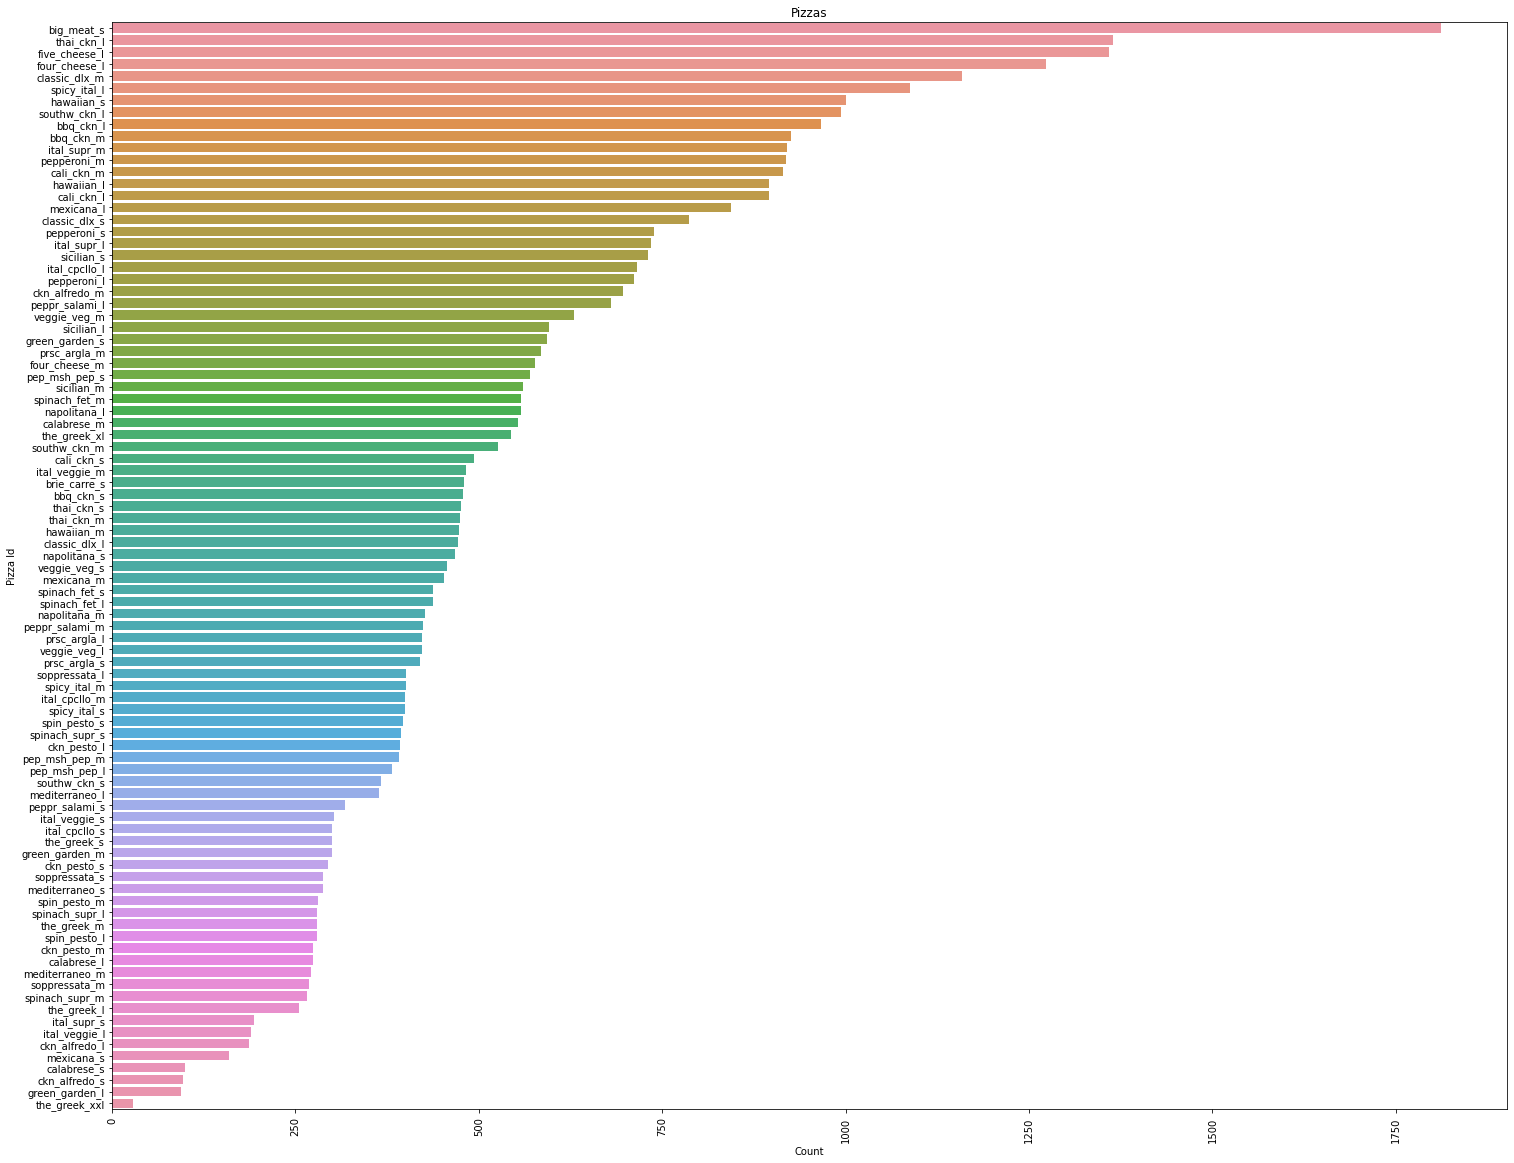

In [10]:
pizza_id_counts = df['pizza_id'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(25, 20))
sns.barplot(x = pizza_id_counts.values, y = pizza_id_counts.index)
plt.xticks(rotation=90)
plt.title('Pizzas')
plt.ylabel('Pizza Id')
plt.xlabel('Count')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 24923 (\N{CJK UNIFIED IDEOGRAPH-615B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


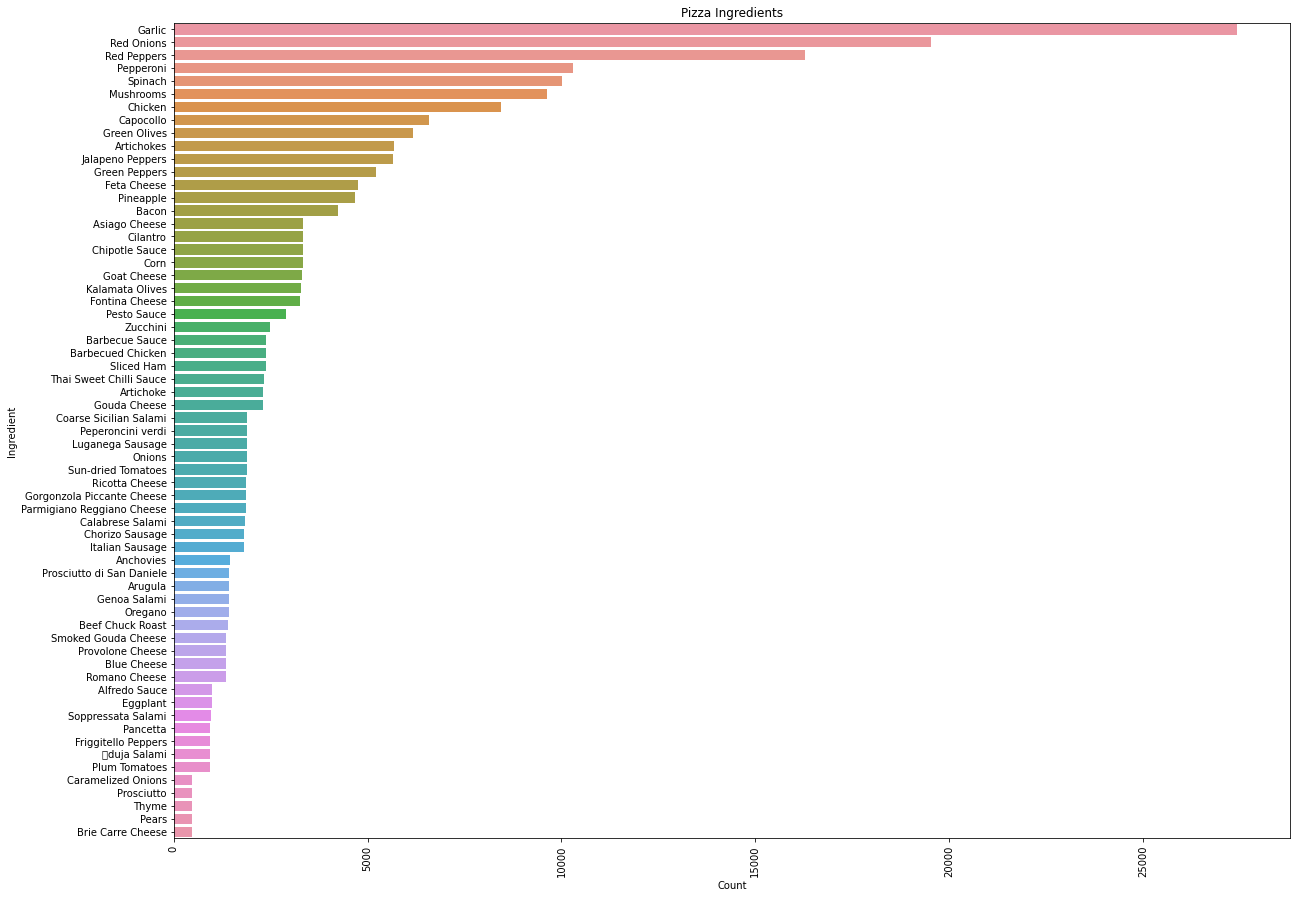

In [11]:
all_ingredients = ','.join(df['pizza_ingredients'].values)

all_ingredients_list = all_ingredients.split(',')
all_ingredients_list = [i.strip() for i in all_ingredients_list if i.strip() not in ['Mozzarella Cheese', 'Tomatoes']]

ingredient_counts = pd.Series(all_ingredients_list).value_counts().sort_values(ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x = ingredient_counts.values, y = ingredient_counts.index)
plt.xticks(rotation=90)
plt.title('Pizza Ingredients')
plt.ylabel('Ingredient')
plt.xlabel('Count')
plt.show()

### In this section several visulizations are created to see if some seasonal patterns exist by months, and to get how the number of orders varies across weekdays, and to find the busiest hours in the day.

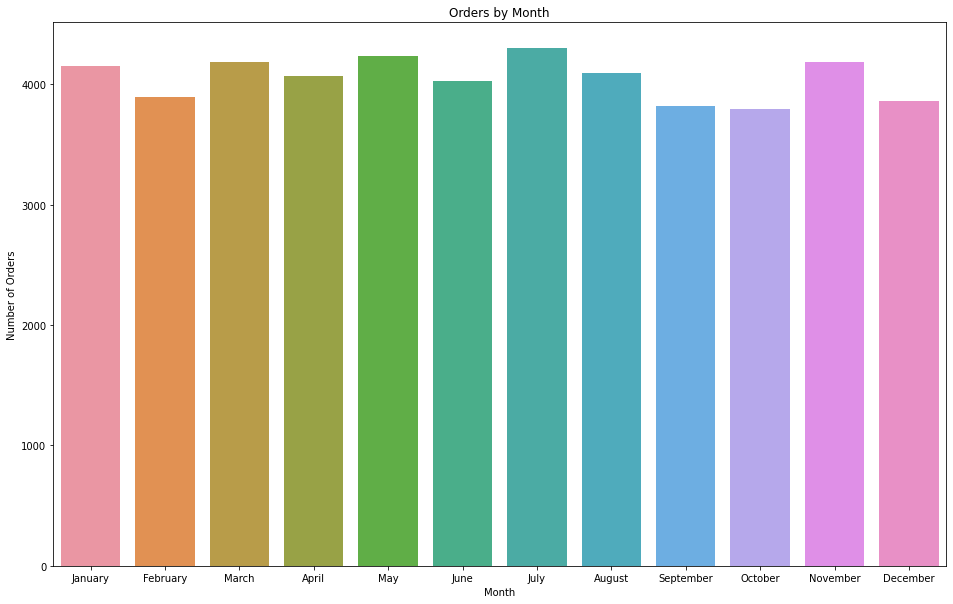

In [12]:
df['month'] = df['order_date'].dt.month_name()

orders_by_month = df['month'].value_counts()

plt.figure(figsize=(16, 10))
sns.barplot(x=orders_by_month.index, y=orders_by_month.values, order = pd.unique(df['month']))
plt.title('Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

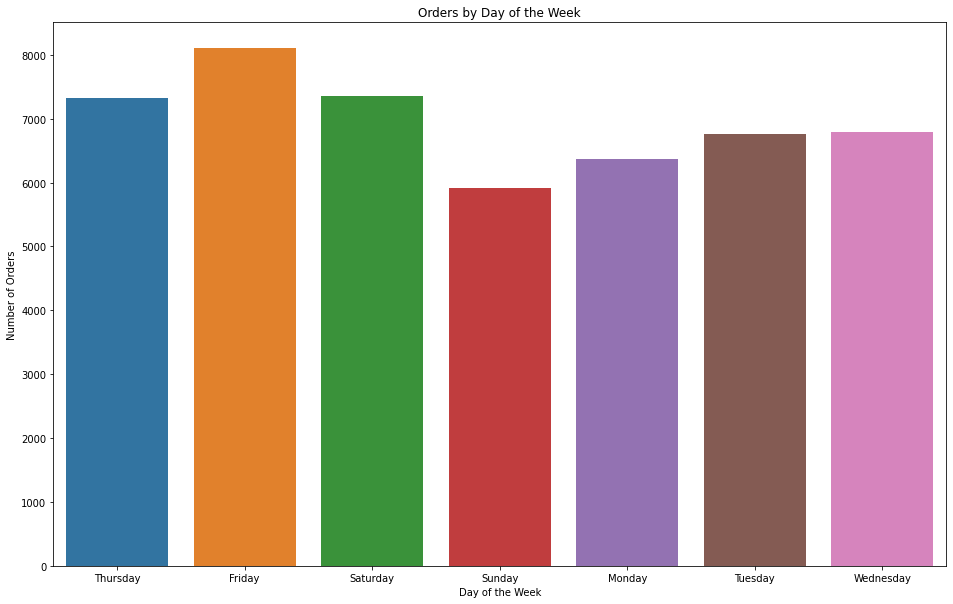

In [13]:
df['day_of_week'] = df['order_date'].dt.day_name()

orders_by_day = df['day_of_week'].value_counts()

plt.figure(figsize=(16, 10))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, order = pd.unique(df['day_of_week']))
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

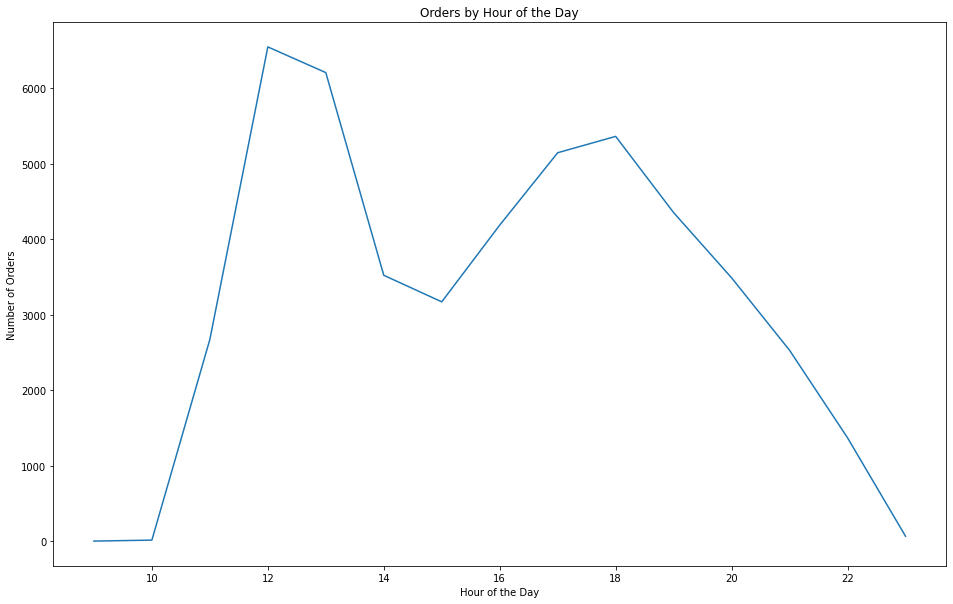

In [14]:
hour_of_day = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour

orders_by_hour = hour_of_day.value_counts().sort_index()

plt.figure(figsize=(16, 10))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

In [15]:
order_totals = df.groupby('order_id')[['total_price', 'quantity']].sum()

avg_order_value = order_totals.mean()

print('The average order value is:', avg_order_value[0])
print('The average quantity of pizzas in each order is:', avg_order_value[1])

The average order value is: 38.30726229508162
The average quantity of pizzas in each order is: 2.321967213114754
